In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ins = pd.read_csv("new_insurance_data.csv")
df_ins.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [4]:
df_ins.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [5]:
df_ins["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
df_ins["sex"].mode()

0    male
dtype: object

In [7]:
df_ins["age"].mean()

39.31000752445448

In [8]:
for col_name in df_ins.columns:
    if df_ins[col_name].dtype == "object":
        df_ins[col_name] = df_ins[col_name].fillna(df_ins[col_name].mode()[0])
    else:
        df_ins[col_name] = df_ins[col_name].fillna(df_ins[col_name].median())
        
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [9]:
df_ins.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.307922,30.664518,1.090433,33364.874093,15.215247,9.100143e+05,1.581682e+07,1.060538,3.686636e+08,13270.422265
std,13.987523,6.094853,1.199619,15535.345575,7.450962,9.178320e+04,2.665699e+07,0.533189,5.658157e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.082630e+07,1.000000,3.225202e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


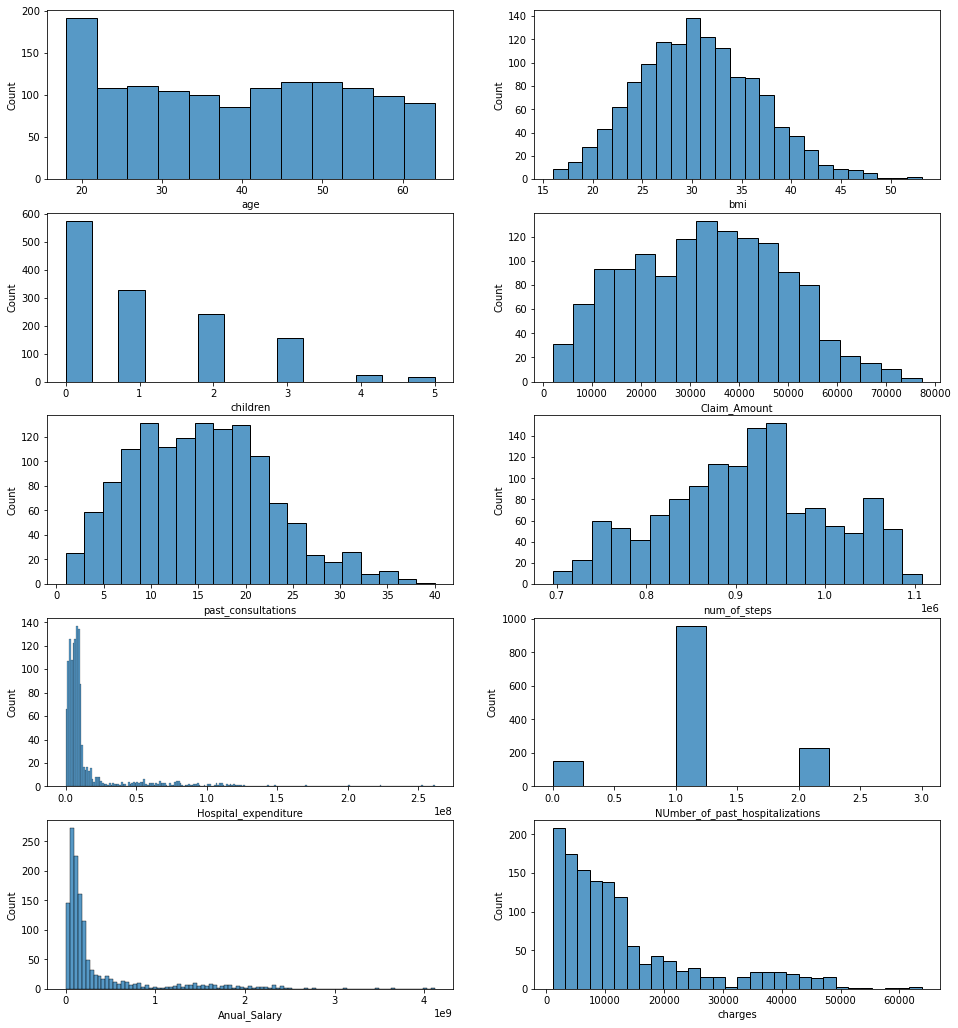

In [10]:
plt.subplots(5, 2, figsize=(16,18))
index = 1
for col_name in df_ins.columns:
    if df_ins[col_name].dtypes == "int64" or df_ins[col_name].dtypes == "float64":
        plt.subplot(5, 2, index)
        sns.histplot(data=df_ins, x=col_name)
        plt.xlabel(col_name)
        index = index + 1

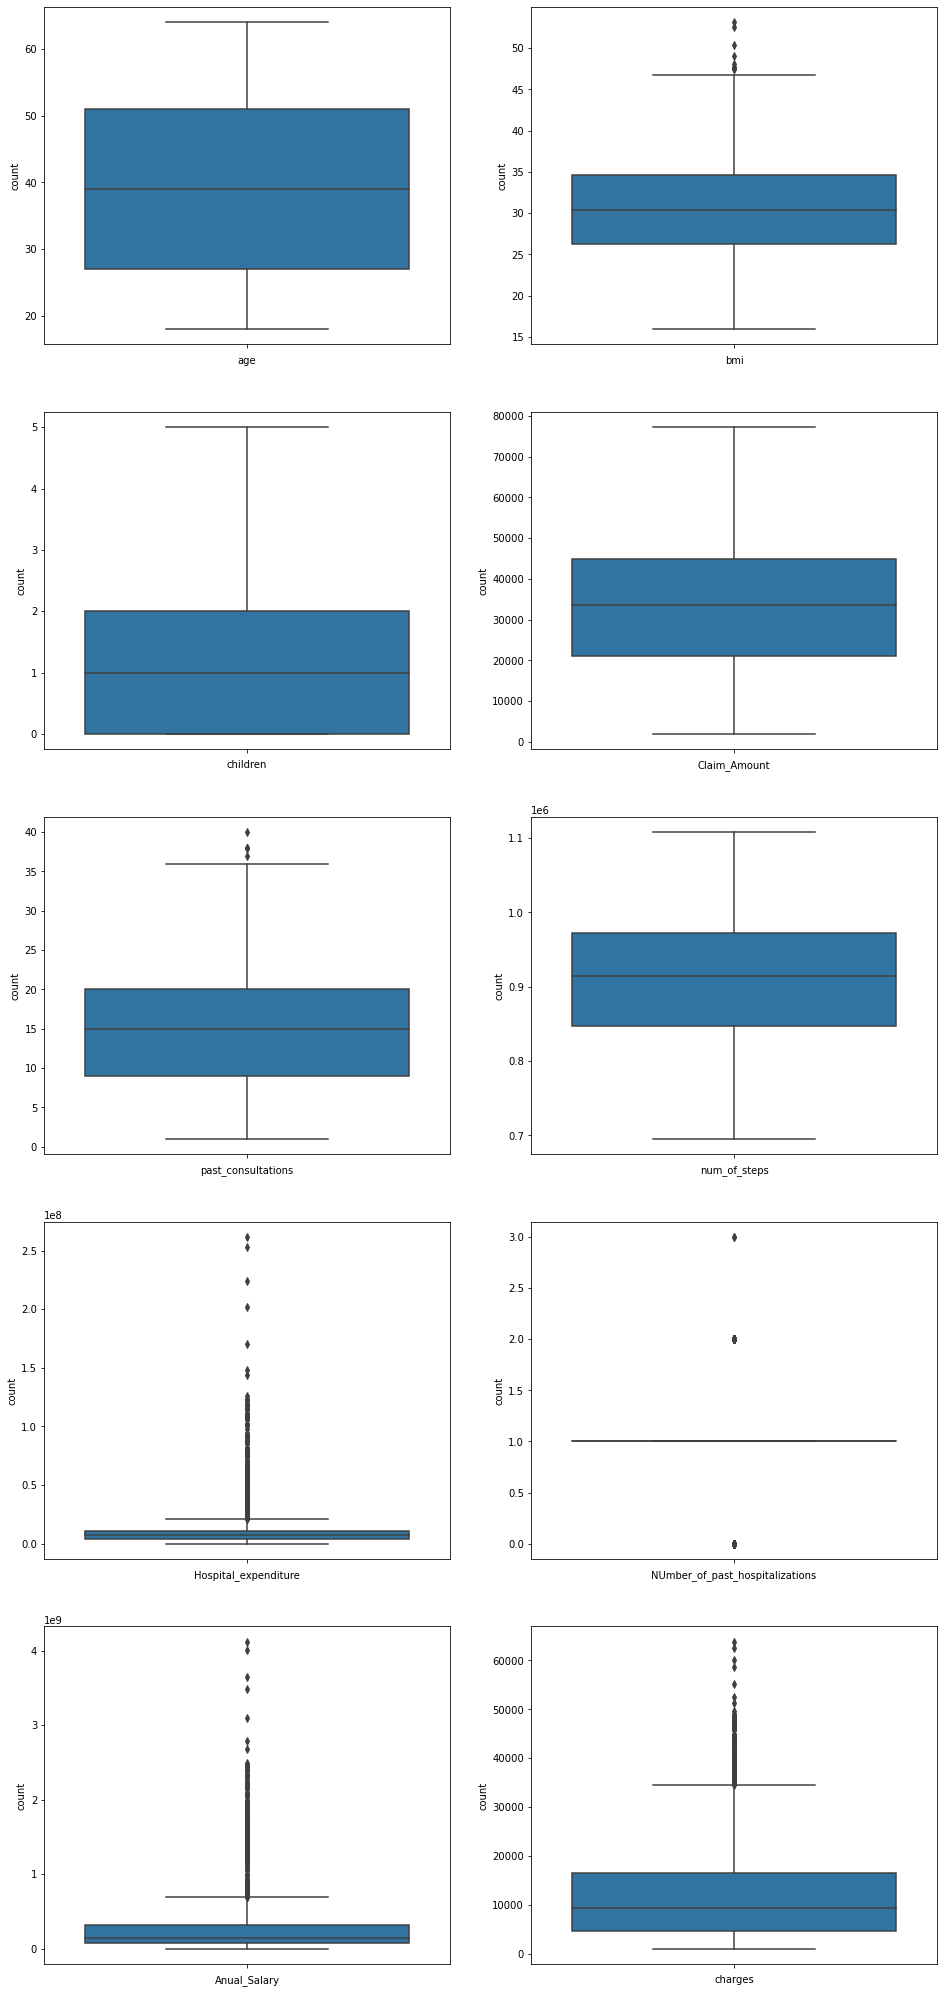

In [11]:
plt.subplots(5, 2, figsize=(16,36))
index = 1
for col_name in df_ins.columns:
    if df_ins[col_name].dtype == "int64" or df_ins[col_name].dtype == "float64":
        plt.subplot(5,2,index)
        sns.boxplot(data=df_ins, y=col_name)
        plt.xlabel(col_name)
        plt.ylabel("count")
        index = index + 1

In [12]:
#Removing outliers
Q1 = df_ins["bmi"].quantile(0.25)
Q3 = df_ins["bmi"].quantile(0.75)
IQR = Q3 - Q1
df_ins = df_ins[(df_ins["bmi"] >= Q1 - 1.5*IQR) & (df_ins["bmi"] <= Q3 + 1.5*IQR)]

Q1 = df_ins["past_consultations"].quantile(0.25)
Q3 = df_ins["past_consultations"].quantile(0.75)
IQR = Q3 - Q1
df_ins = df_ins[(df_ins["past_consultations"] >= Q1 - 1.5*IQR) & (df_ins["past_consultations"] <= Q3 + 1.5*IQR)]

Q1 = df_ins["Hospital_expenditure"].quantile(0.25)
Q3 = df_ins["Hospital_expenditure"].quantile(0.75)
IQR = Q3 - Q1
df_ins = df_ins[(df_ins["Hospital_expenditure"] >= Q1 - 1.5*IQR) & (df_ins["Hospital_expenditure"] <= Q3 + 1.5*IQR)]

Q1 = df_ins["Anual_Salary"].quantile(0.25)
Q3 = df_ins["Anual_Salary"].quantile(0.75)
IQR = Q3 - Q1
df_ins = df_ins[(df_ins["Anual_Salary"] >= Q1 - 1.5*IQR) & (df_ins["Anual_Salary"] <= Q3 + 1.5*IQR)]

In [13]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   object 
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   object 
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   object 
 12  charges             

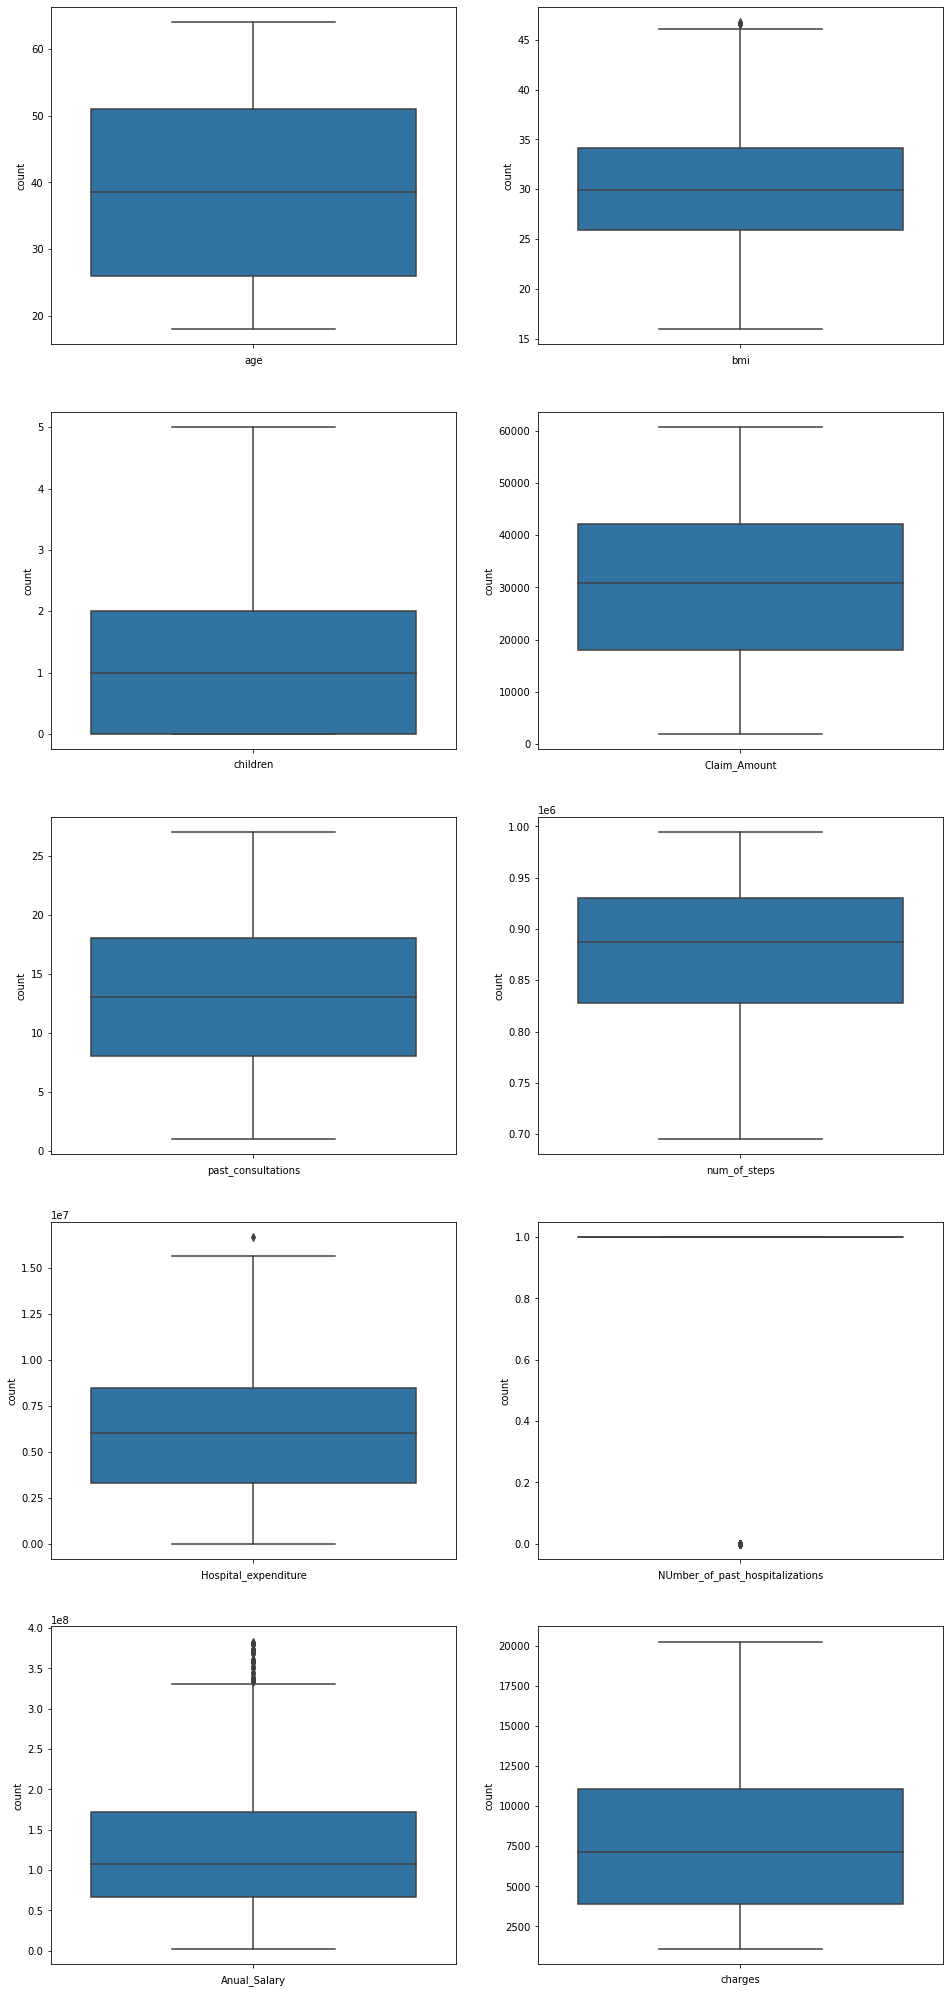

In [14]:
plt.subplots(5, 2, figsize=(16,36))
index = 1
for col_name in df_ins.columns:
    if df_ins[col_name].dtype == "int64" or df_ins[col_name].dtype == "float64":
        plt.subplot(5,2,index)
        sns.boxplot(data=df_ins, y=col_name)
        plt.xlabel(col_name)
        plt.ylabel("count")
        index = index + 1

<AxesSubplot:>

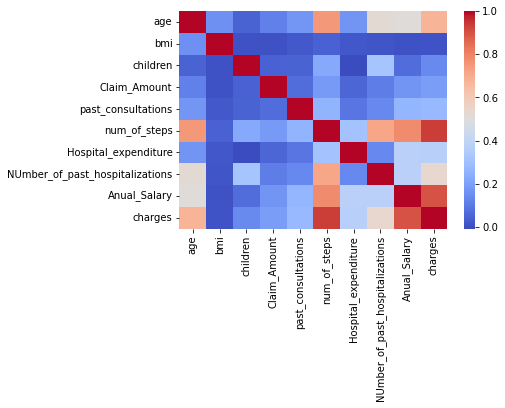

In [15]:
#correlation
sns.heatmap(df_ins.corr(), cmap="coolwarm")

In [37]:
#Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import *

In [19]:
# get numerical independent variables
col_list = []
for col_name in df_ins.columns:
    if (df_ins[col_name].dtype != "object") & (col_name != "charges"):
        col_list.append(col_name)

#Calculate the variance inflation factor for all independent variables
X = df_ins[col_list]
df_vif = pd.DataFrame()
df_vif["features"] = X.columns
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif

,features,VIF
0,age,15.608958
1,bmi,26.366792
2,children,2.029059
3,Claim_Amount,5.685160
4,past_consultations,6.257322
5,num_of_steps,61.435128
6,Hospital_expenditure,5.324604
7,NUmber_of_past_hospitalizations,12.070695
8,Anual_Salary,5.723023


In [20]:
#Drop the variable with the highest VIF
df_ins = df_ins.drop(["num_of_steps"], axis=1)

In [ ]:
#Repeat the above 2 steps untill we get all VIF's below 5

In [21]:
col_list = []
for col_name in df_ins.columns:
    if (df_ins[col_name].dtype != "object") & (col_name != "charges"):
        col_list.append(col_name)
        
X = df_ins[col_list]
df_vif = pd.DataFrame()
df_vif["features"] = X.columns
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif

,features,VIF
0,age,14.636412
1,bmi,12.356789
2,children,2.016852
3,Claim_Amount,5.250730
4,past_consultations,5.835804
5,Hospital_expenditure,5.034008
6,NUmber_of_past_hospitalizations,10.723083
7,Anual_Salary,5.633486


In [22]:
df_ins = df_ins.drop(["age"], axis=1)

In [23]:
col_list = []
for col_name in df_ins.columns:
    if (df_ins[col_name].dtype != "object") & (col_name != "charges"):
        col_list.append(col_name)
        
X = df_ins[col_list]
df_vif = pd.DataFrame()
df_vif["features"] = X.columns
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif

,features,VIF
0,bmi,10.365491
1,children,1.978240
2,Claim_Amount,5.238177
3,past_consultations,5.816717
4,Hospital_expenditure,5.032963
5,NUmber_of_past_hospitalizations,8.414445
6,Anual_Salary,4.900730


In [24]:
df_ins = df_ins.drop(["bmi"], axis=1)

In [25]:
col_list = []
for col_name in df_ins.columns:
    if (df_ins[col_name].dtype != "object") & (col_name != "charges"):
        col_list.append(col_name)
        
X = df_ins[col_list]
df_vif = pd.DataFrame()
df_vif["features"] = X.columns
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif

,features,VIF
0,children,1.976461
1,Claim_Amount,4.549928
2,past_consultations,5.040029
3,Hospital_expenditure,4.567501
4,NUmber_of_past_hospitalizations,7.336623
5,Anual_Salary,4.854536


In [26]:
df_ins = df_ins.drop(["NUmber_of_past_hospitalizations"], axis=1)

In [27]:
col_list = []
for col_name in df_ins.columns:
    if (df_ins[col_name].dtype != "object") & (col_name != "charges"):
        col_list.append(col_name)
        
X = df_ins[col_list]
df_vif = pd.DataFrame()
df_vif["features"] = X.columns
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif

,features,VIF
0,children,1.714434
1,Claim_Amount,4.169548
2,past_consultations,4.672344
3,Hospital_expenditure,4.392130
4,Anual_Salary,4.398756


In [30]:
#Now perform linear regession using the above 5 independent variables and charges as dependent output variable
x = df_ins.loc[:,["children", "Claim_Amount", "past_consultations", "Hospital_expenditure", "Anual_Salary"]]
y = df_ins.iloc[:,-1]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [32]:
l_model = LinearRegression()
l_model.fit(x_train, y_train)

LinearRegression()

In [33]:
predictions = l_model.predict(x_test)
predictions

array([ 7477.40423015, 10578.443268  ,  4259.66079296, 12021.52859229,
        9915.24357947,  2815.10173751,  7475.69764865,  4043.79959091,
        1877.3664432 ,  1546.64484871,  9360.93985205,  6292.59935308,
        7121.09205234,  6919.15474245,  7248.78463738,  8111.02307201,
        5326.97993865, 11834.60782046, 10988.57714738,  3929.55693796,
        4978.51897858,  7053.65734505,  5338.75600213, 10726.59072816,
        8127.79035405,  9231.96653164,  3225.88984565,  1978.26793839,
        8050.45969317,  6813.84050341,  9058.84833288,  9692.93877761,
        7379.36743983,  3138.63622728, 10949.72273966,  6508.93391765,
        2871.79435017,  5930.40534102,  8270.06183064,  3578.45213645,
        2814.68269166,  7621.29487817,  9386.6030546 ,  4556.84813415,
        6973.8668665 ,  6086.8352666 ,  9303.55459595,  9646.39571652,
        1736.03880062,  4727.13687211, 11053.63024564, 10792.65293436,
       10474.86182255,  4616.99422501,  7336.26419775,  4537.25455112,
      

In [36]:
actu_pred = pd.DataFrame(columns={"Actual_data", "Prediction_data"})
actu_pred["Actual_data"] = y_test
actu_pred["Prediction_data"] = predictions
actu_pred["Error"] = actu_pred["Actual_data"] - actu_pred["Prediction_data"]
actu_pred

,Actual_data,Prediction_data,Error
752,10704.47000,7477.404230,3227.065770
723,10197.77220,10578.443268,-380.671068
177,2801.25880,4259.660793,-1458.401993
834,11848.14100,12021.528592,-173.387592
718,10107.22060,9915.243579,191.977021
...,...,...,...
627,8688.85885,5736.463932,2952.394918
993,16085.12750,15243.838338,841.289162
426,5976.83110,4847.101617,1129.729483
895,12925.88600,11820.005441,1105.880559


In [40]:
r2_on_test = r2_score(y_test, predictions)
r2_on_test

0.8461568208269036